In [ ]:
# Bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
# Carregar o conjunto Iris
iris = load_iris()
X = iris.data  # Var. independetes
Y = iris.target  # Var. dependente

# print(iris.feature_names)
# print(iris.target_names)

print(X.shape)
print(Y.shape)

# Divisão entre treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

(150, 4)
(150,)


In [ ]:
# Criar o classificador RF
rf_classifier = RandomForestClassifier(n_estimators=4, random_state=42, oob_score=True, verbose=1)

# Treinar usando o conjunto de treino
rf_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=4, oob_score=True, random_state=42,
                       verbose=1)

In [ ]:
# Prever as classes usando o conjunto de teste
Y_pred = rf_classifier.predict(X_test)

# Cálculo da acurácia
accuracy = accuracy_score(Y_test, Y_pred)
print("Acurácia do classificador:", accuracy*100, "%")

oob_accuracy = rf_classifier.oob_score_
print("Acurácia do classificador (OOB):", accuracy*100, "%")

Acurácia do classificador: 100.0 %
Acurácia do classificador (OOB): 100.0 %


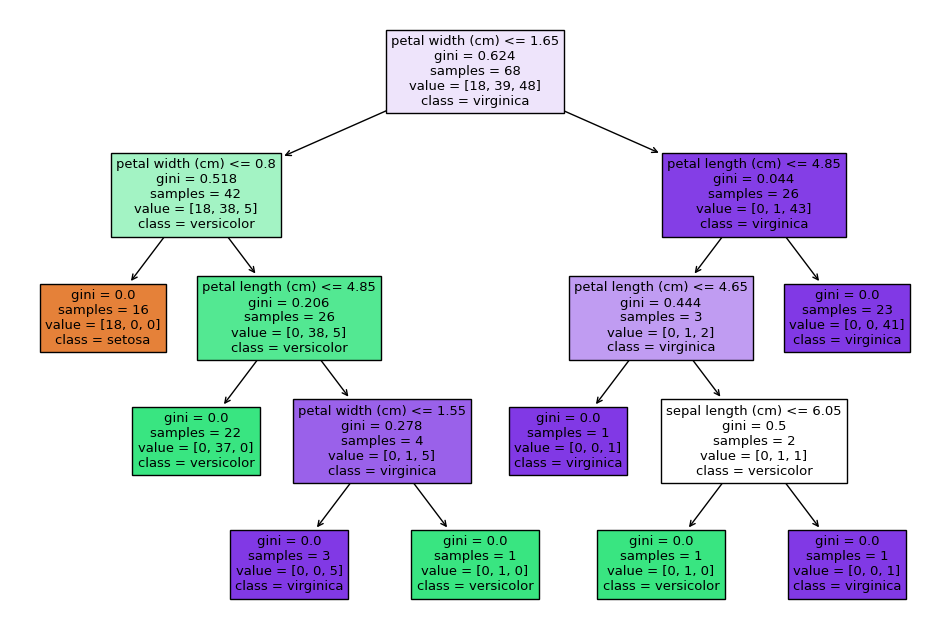

In [ ]:
# Visualização das árvores (escolher o número da árvore)
plt.figure(figsize=(12, 8))
plot_tree(rf_classifier.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

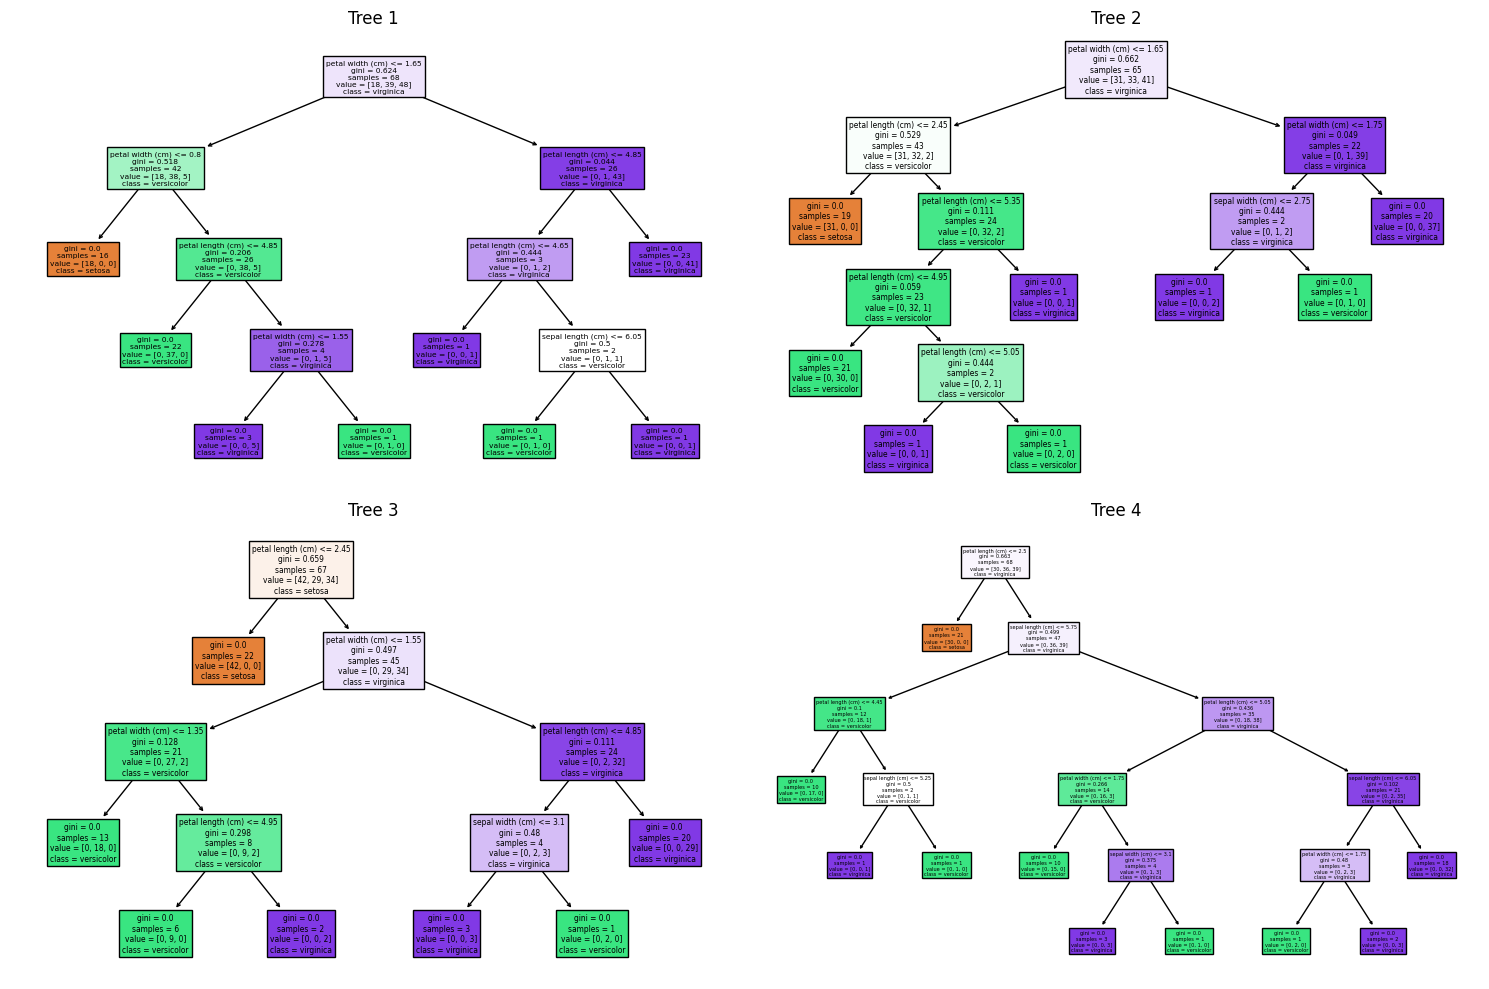

In [ ]:
# Visualização das árvores (todas em uma única figura)
plt.figure(figsize=(15, 10))
for i, tree in enumerate(rf_classifier.estimators_):
    plt.subplot(2, 2, i + 1)
    plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    plt.title(f'Tree {i+1}')
plt.tight_layout()
plt.show()

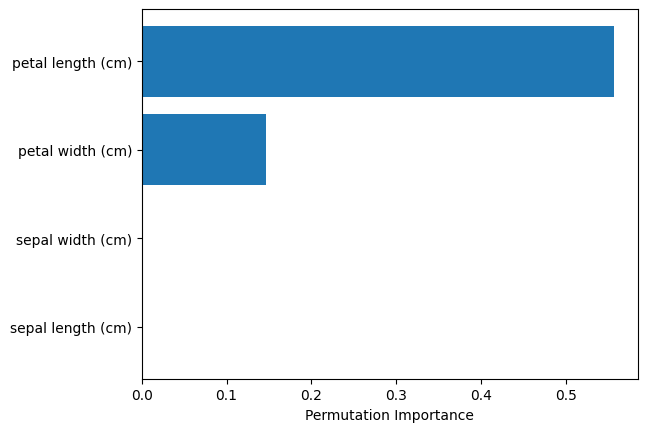

In [ ]:
# Importância das variáveis (permutação)
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_classifier, X_test, Y_test, n_repeats=50, random_state=42)

feature_names = iris.feature_names

sorted_idx = result.importances_mean.argsort()

# plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.show()